In [1]:
# tai thu vien
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [2]:
folder = '/content/drive/MyDrive/Cu-Qua_dataset/train_set/'
x_train,y_train=list(),list()
for file in listdir(folder):
  if file.startswith('bi dao '):
    output=1
  if file.startswith('bi do '):
    output=2
  if file.startswith('ca rot '):
    output=3
  if file.startswith('cai trang '):
    output=4
  if file.startswith('cu den '):
    output=5
  if file.startswith('dua leo '):
    output=6
  if file.startswith('khoai lang '):
    output=7
  if file.startswith('khoai tay '):
    output=8
  if file.startswith('ot hiem '):
    output=9
  if file.startswith('ot vang '):
    output=10
  photo=load_img(folder+file,target_size=(50,50))
  photo = img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train = asarray(x_train)
y_train = asarray(y_train)
y_train = to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy', x_train)
save('y_train.npy', y_train)

folder = '/content/drive/MyDrive/Cu-Qua_dataset/test_set/'
x_test, y_test = list(), list()
for file in listdir(folder):
  if file.startswith('bi dao '):
    output=1
  if file.startswith('bi do '):
    output=2
  if file.startswith('ca rot '):
    output=3
  if file.startswith('cai trang '):
    output=4
  if file.startswith('cu den '):
    output=5
  if file.startswith('dua leo '):
    output=6
  if file.startswith('khoai lang '):
    output=7
  if file.startswith('khoai tay '):
    output=8
  if file.startswith('ot hiem '):
    output=9
  if file.startswith('ot vang '):
    output=10
  photo=load_img(folder+file, target_size=(50,50))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test = asarray(x_test) 
y_test = asarray(y_test) 
y_test = to_categorical(y_test)
print(x_test.shape, y_test.shape)
save('x_test.npy', x_test)
save('y_test.npy', y_test)

x_train = x_train.reshape(398, 50, 50, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(100, 50, 50, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)
  
# thuc hien cac tich chap
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(50,50,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))

model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=100, epochs=88, verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

model.save('cu_qua.h5')



(398, 50, 50, 3) (398, 11)
(100, 50, 50, 3) (100, 11)
(398, 50, 50, 3)
(100, 50, 50, 3)
Epoch 1/88
4/4 [==============================] - 8s 1s/step - loss: 2.3508 - accuracy: 0.1734
Epoch 2/88
4/4 [==============================] - 7s 2s/step - loss: 2.2577 - accuracy: 0.1156
Epoch 3/88
4/4 [==============================] - 3s 744ms/step - loss: 2.2123 - accuracy: 0.2136
Epoch 4/88
4/4 [==============================] - 3s 745ms/step - loss: 2.1704 - accuracy: 0.2136
Epoch 5/88
4/4 [==============================] - 3s 748ms/step - loss: 2.1057 - accuracy: 0.2337
Epoch 6/88
4/4 [==============================] - 5s 1s/step - loss: 1.9603 - accuracy: 0.3241
Epoch 7/88
4/4 [==============================] - 3s 755ms/step - loss: 1.7510 - accuracy: 0.4020
Epoch 8/88
4/4 [==============================] - 3s 742ms/step - loss: 1.4819 - accuracy: 0.4598
Epoch 9/88
4/4 [==============================] - 3s 750ms/step - loss: 1.2390 - accuracy: 0.5226
Epoch 10/88
4/4 [======================

Input Cu-Qua: bi do
1/1 [==============================] - 0s 189ms/step
Predicted label: bi do
1/1 [==============================] - 0s 37ms/step
Predicted label: bi do
1/1 [==============================] - 0s 33ms/step
Predicted label: bi do
1/1 [==============================] - 0s 29ms/step
Predicted label: bi do
1/1 [==============================] - 0s 35ms/step
Predicted label: bi do
1/1 [==============================] - 0s 32ms/step
Predicted label: bi do


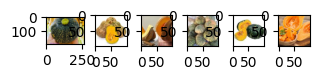

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
folder = '/content/drive/MyDrive/Cu-Qua_dataset/test_set/'
dict = {1:'bi dao', 2:'bi do', 3:'ca rot', 4:'cai trang', 5:'cu den',
        6:'dua leo', 7:'khoai lang', 8:'khoai tay', 9:'ot hiem', 10:'ot vang'}

input_ = input("Input Cu-Qua: ")
for i in range(0,6):
  plt.subplot(10,11,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  
  img = load_img(filename, target_size=(50, 50))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
 
  prediction = model.predict(img_arr)
  
  label = np.argmax(prediction)
  print('Predicted label:', dict[label])
plt.show()